<a href="https://colab.research.google.com/github/singhnidh/machine-learning-lab/blob/main/Handwritten_Digit_Recognition_using_SVMs_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA

In [ ]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
test_data = pd.read_csv("/content/HWD_test.csv")
training_data = pd.read_csv("/content/HWD_train.csv")

In [ ]:
training_data.shape

(42000, 785)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_data.max().sort_values()

pixel783      0
pixel53       0
pixel52       0
pixel532      0
pixel560      0
           ... 
pixel330    255
pixel331    255
pixel332    255
pixel314    255
pixel430    255
Length: 785, dtype: int64

In [ ]:
training_data.isna().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
training_data.duplicated().sum()

0

#**There are no duplicated rows in the dataframe**

In [ ]:
training_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
count_table = training_data.label.value_counts()
count_table = count_table.reset_index().sort_values(by='index')
count_table

,index,label
6,0,4132
0,1,4684
4,2,4177
2,3,4351
7,4,4072
9,5,3795
5,6,4137
1,7,4401
8,8,4063
3,9,4188


<Axes: xlabel='index', ylabel='label'>

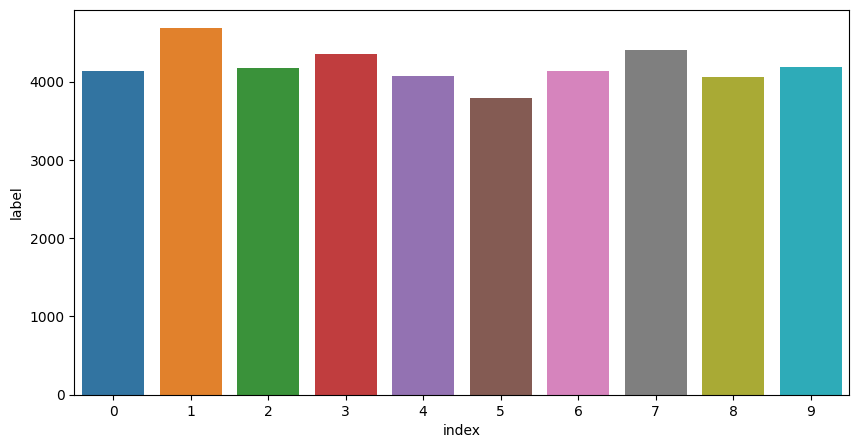

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='index', y='label', data=count_table)

<Axes: ylabel='label'>

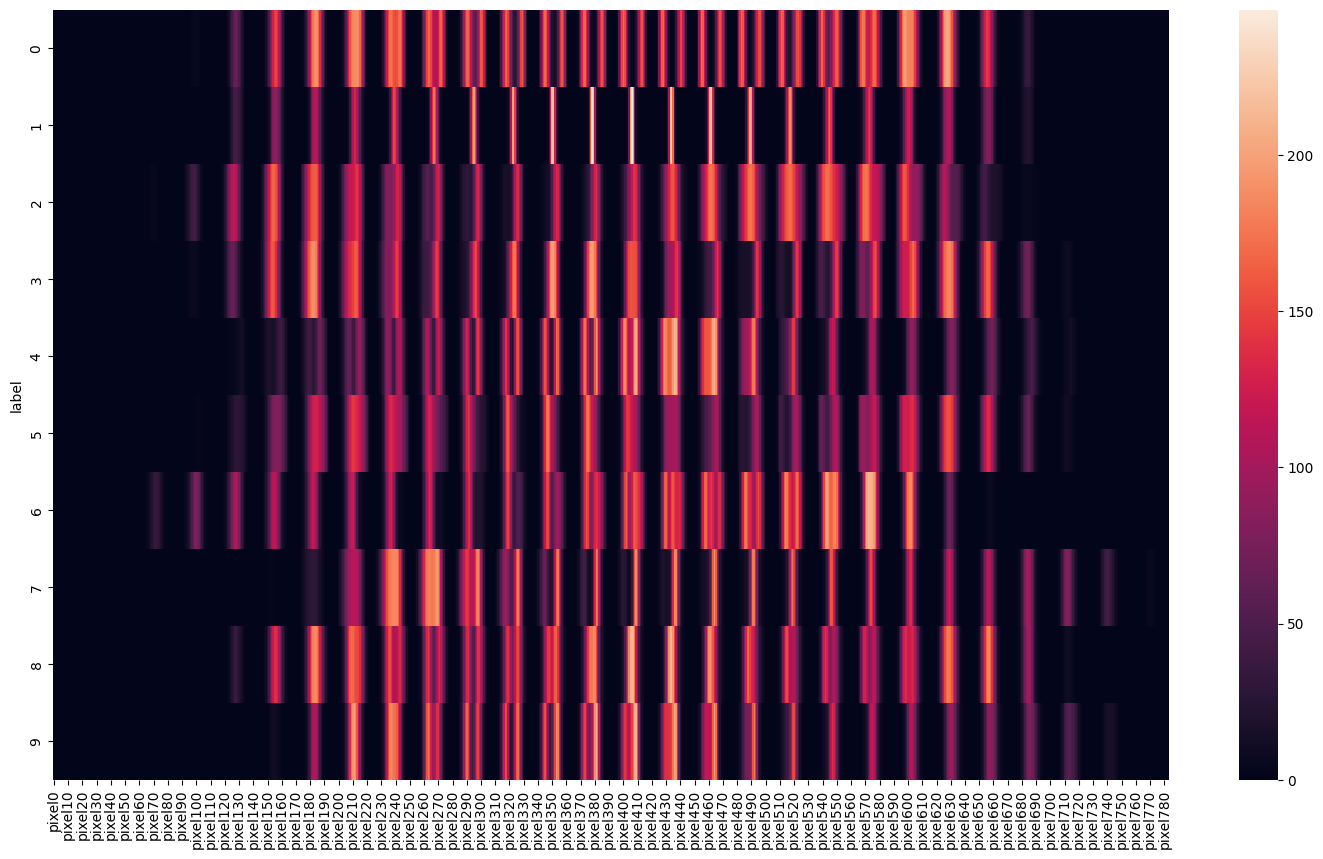

In [ ]:
digit_means = training_data.groupby('label').mean()
digit_means.head()
plt.figure(figsize=(18, 10))
sns.heatmap(digit_means)

In [ ]:
# average feature values
round(training_data.drop('label', axis=1).mean(), 2).sort_values()

pixel0        0.00
pixel532      0.00
pixel504      0.00
pixel477      0.00
pixel476      0.00
             ...  
pixel211    135.49
pixel434    135.52
pixel408    137.42
pixel435    139.07
pixel407    139.83
Length: 784, dtype: float64

In [ ]:
# splitting into X and y
X = training_data.drop("label", axis = 1)
y = training_data['label']

In [ ]:
# scaling the features
X_scaled = scale(X)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# applying PCA to find number of Principal components to use
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

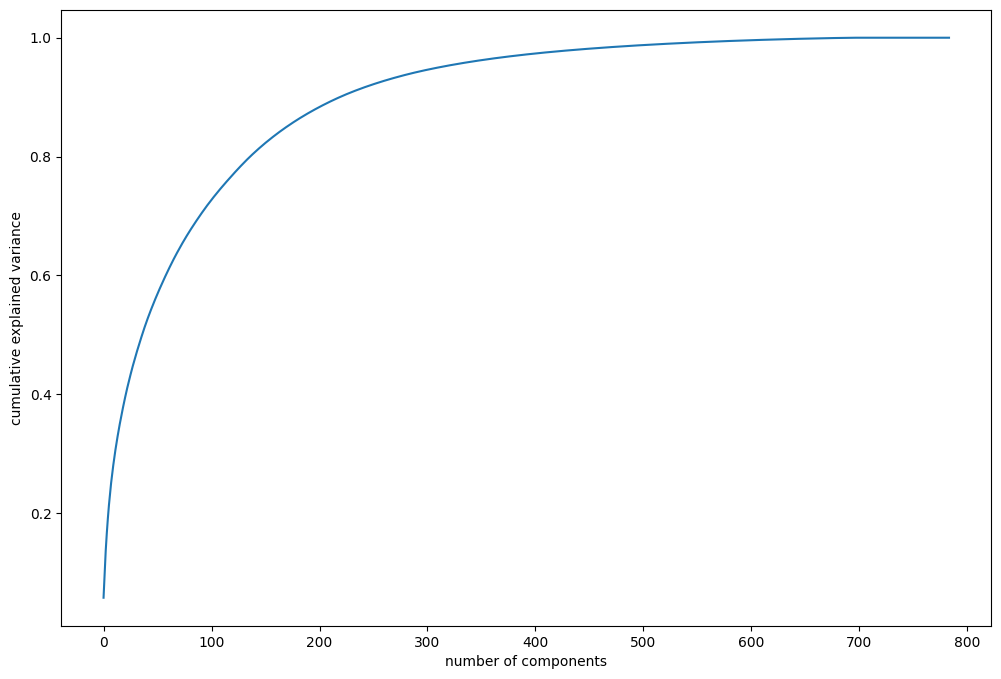

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = IncrementalPCA(n_components=400)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(29400, 400)

#**Building and Evaluating the Final Model**

#**Let's now build and evaluate the final model, i.e. the model with highest test accuracy.**

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma = 0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9676984126984127 



In [ ]:
# scaling test data
# splitting into X and y
X_test_data = test_data
X_test_data = scale(X_test_data)
X_test_data = pca.transform(X_test_data)
y_test_pred = model.predict(X_test_data)
y_test_pred

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
output = pd.DataFrame({"ImageId": i+1 , "Label": y_test_pred[i]} for i in range(0, X_test_data.shape[0]))
output.to_csv('submission.csv', index=False)